In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns

In [2]:
boston = load_boston()

In [3]:
bos =pd.DataFrame(boston.data)
bos

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
bos.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
 bos.drop( labels=9, axis = 1,inplace = True)

c:\users\sujat\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sujat\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sujat\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

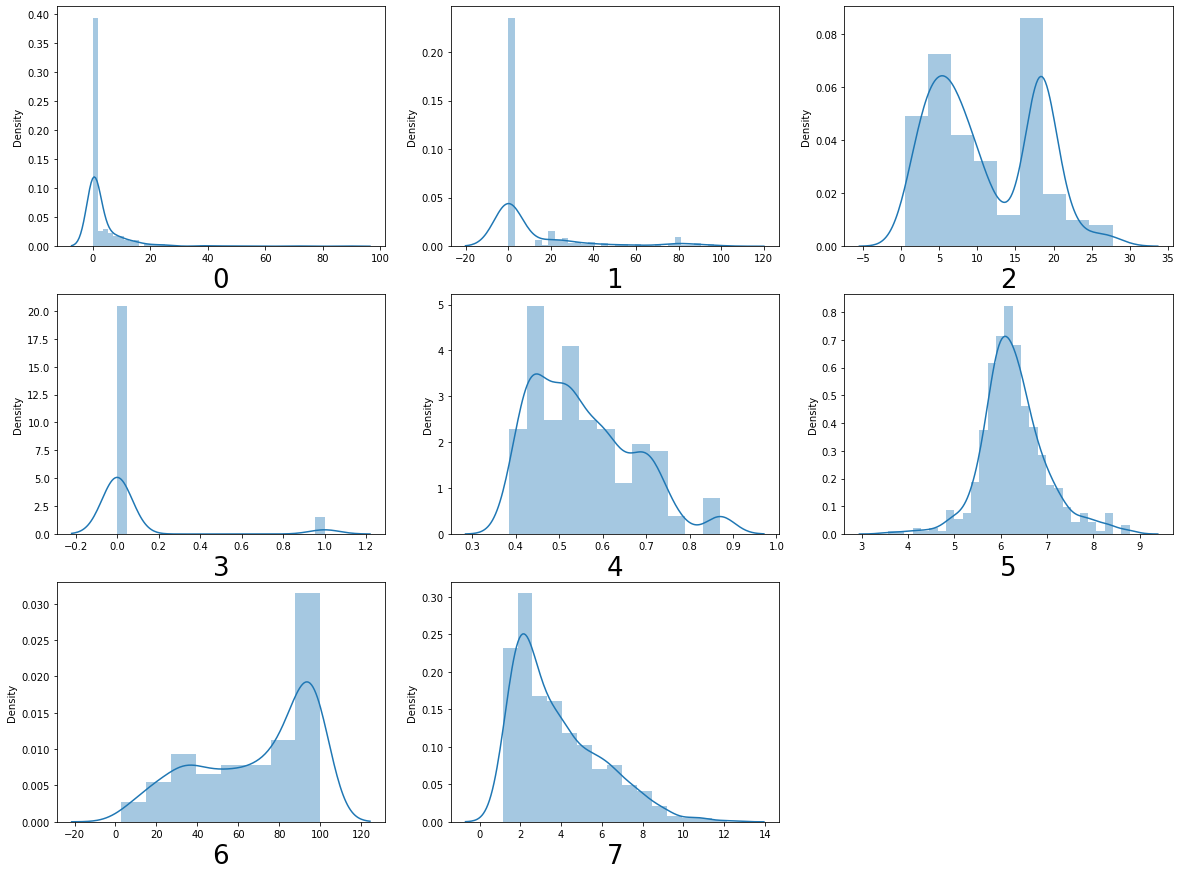

In [7]:
# here we are visiualizing the relationship between the features and dependent variable
plt.figure(figsize = (20,15),facecolor='white',)
plotnumber = 1
for column in bos:
    if plotnumber<9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize = 26)
    plotnumber+=1
plt.show()

In [8]:
plt.figure(figsize=(20,15),facecolor = 'white')
for columns in bos:
    if plotnumber<=12:
        ax=plt.subplots(1,4,plotnumber)
        sns.scatter(bos[column])
        plt.xlabel(column,fontsize=26)
    plotnumber+=1
plt.show()

<Figure size 1440x1080 with 0 Axes>

In [9]:
x= bos.drop(columns=12)
y=bos[12]

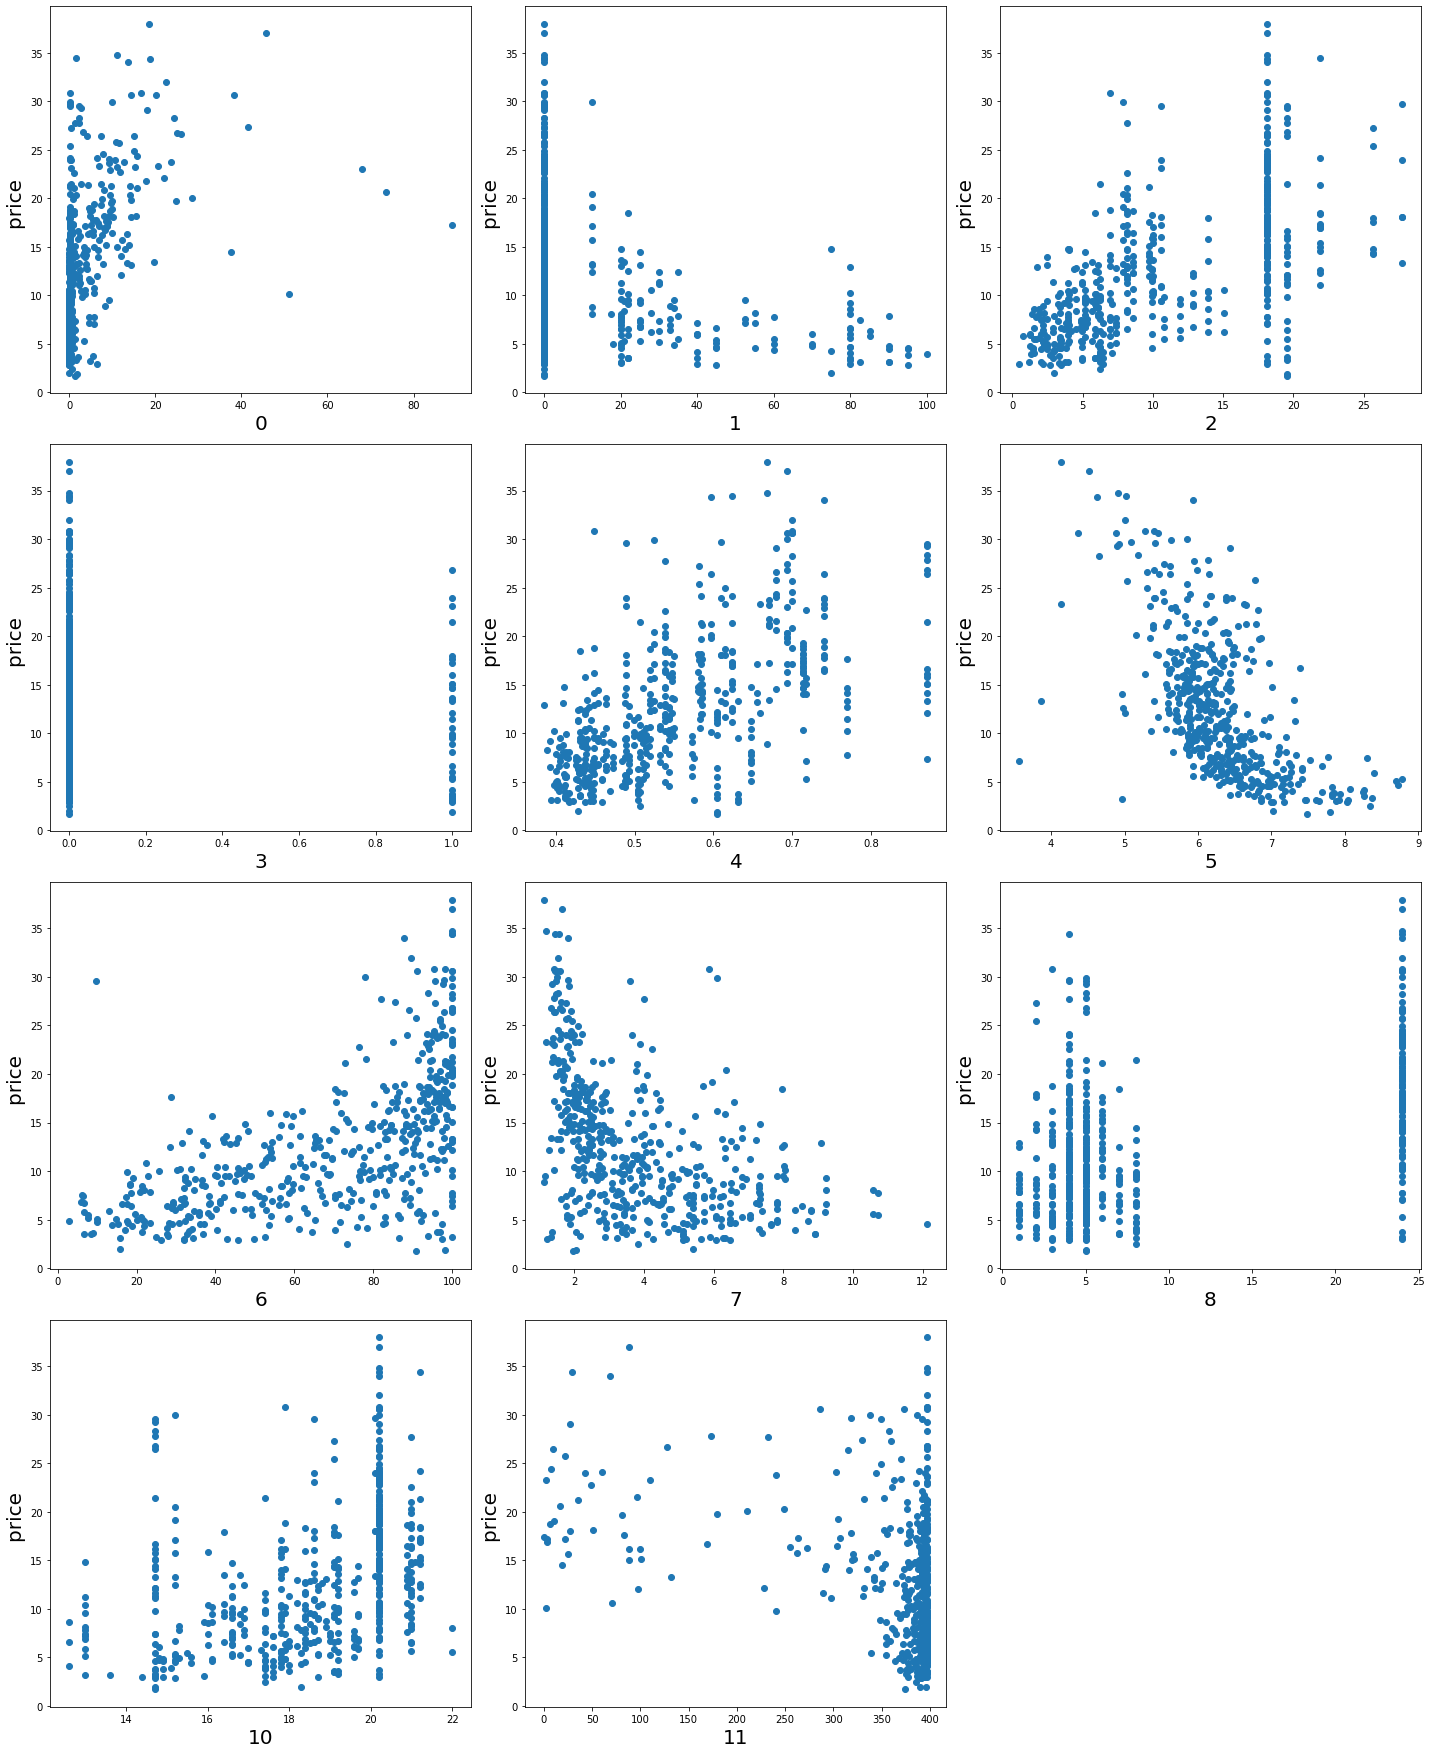

In [10]:
# for scatter plot 
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('price ',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [11]:
from sklearn.preprocessing import StandardScaler 

In [12]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

c:\users\sujat\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sujat\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sujat\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

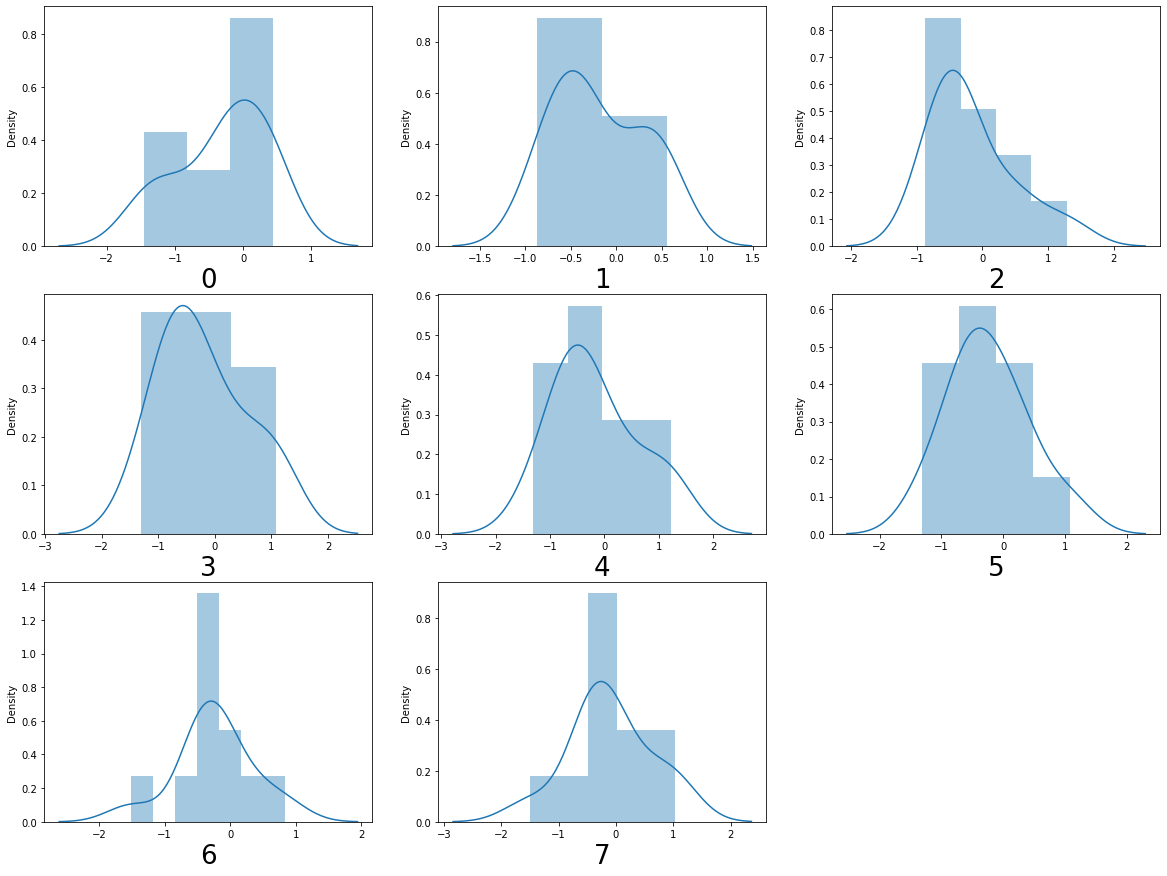

In [13]:
plt.figure(figsize = (20,15),facecolor='white',)
plotnumber = 1
for column in bos:
    if plotnumber<9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_scaled[column])
        plt.xlabel(column,fontsize = 26)
    plotnumber+=1
plt.show()

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = x_scaled
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables,i) for i in range (variables.shape[1])]
vif["features"] = x.columns

In [15]:
vif

,VIF,features
0,1.750040,0
1,2.178558,1
2,3.206741,2
3,1.054659,3
4,4.349173,4
5,1.371960,5
6,2.738128,6
7,3.948687,7
8,2.833332,8
9,1.785315,10


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
# now training and testing the dataset
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.2, random_state = 42)

In [18]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
regression.score(x_train,y_train)

0.6448892824570098

In [20]:
from sklearn.metrics import r2_score

In [22]:
#r2_score = (1-(1-r2)*(n-1))/(n-p-1) # this is the mathamatical formula for calculating the adj_r2

In [23]:
x = sm.add_constant(x)
model = sm.OLS(x_train, y_test).fit()

NameError: name 'sm' is not defined

In [24]:
x1=(1-(1-0.6448892824570098))*(504)
x1/(505-10-1)

0.6579437213731436

In [25]:
print(model.rsquared_adj)

NameError: name 'model' is not defined

In [26]:
regression.score(x_test,y_test)

0.6956432221901313

In [27]:
y_pred = regression.predict(x_test)
y_pred

array([11.24504656,  4.54810965, 17.01664557,  6.98578912, 16.93035014,
       11.56444363, 14.42707223, 15.69332216, 15.48054517, 14.02992203,
       13.33592531, 14.04247937, 29.63768667, 10.15581046, 14.32595879,
       11.19839142, 16.70207492, 24.29079451,  1.03232854, 18.13343032,
        7.17593835,  7.38120825, 16.64263772, 10.71834827, 19.03743954,
       20.3196645 , 10.29034849, 18.00380641, 12.79603685, 14.3919647 ,
       15.31175347,  9.36689189, 13.23816991, 21.83315128, 17.63257212,
       20.29570211,  6.10965758, 11.56810763,  9.87104371,  6.16213215,
       16.35111921,  8.7663342 ,  0.67390514, 11.26713567,  9.6716167 ,
       19.81288638, 16.73219959,  5.38215377, 15.65908411,  9.24243416,
       13.67854041,  4.8845698 , 14.29310484,  9.60897341,  4.62174162,
       12.6460245 , 18.08380801,  5.96785139,  8.38181252, 14.56768108,
        7.65100616,  3.89350389,  6.29524464, 13.698217  ,  7.90973677,
       16.13016361, 16.64049153,  7.96452146,  6.46810282, 20.53

In [28]:
from sklearn.metrics import r2_score

In [29]:
r2_score(y_test,y_pred)

0.6956432221901313

In [30]:
regression.coef_

array([ 0.52246079,  0.39862911,  0.41728513, -0.42291812,  1.02684064,
       -3.10577311,  2.19684264,  0.20967527,  0.48460422,  0.29868468,
       -0.60715808])

In [31]:
regression.intercept_

12.617320619180642

In [32]:
y_error = y_test - y_pred
y_error

173   -2.205047
274   -1.018110
491    1.053354
72    -1.465789
452    0.339650
         ...   
412    7.318238
436   -1.422826
411    3.479620
86     3.078882
75    -0.269697
Name: 12, Length: 102, dtype: float64

# here by using stats model we can do prediction 
# but stat model does not add intercept to the model automatically we need to add the intercept in the model manully

In [33]:
import statsmodels.api as sma

x_train = sma.add_constant(x_train)
y_train = sma.add_constant(y_test)

# Linear regression can be run by using sm.OLS

In [34]:
import statsmodels.formula.api as smf
regression2 = smf.ols(x_train,y_train).fit()

PatsyError: model is missing required outcome variables